In [3]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from io import StringIO

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Step 2: Create Sample Dataset
data = StringIO("""
age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
56,0,1,140,294,0,0,153,0,1.3,1,0,2,0
44,1,1,120,263,0,1,173,0,0.0,2,0,3,0
52,1,2,172,199,1,1,162,0,0.5,2,0,3,0
57,1,2,150,168,0,1,174,0,1.6,2,0,2,0
""")

df = pd.read_csv(data)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Step 3: Split Dataset
X = df.drop("target", axis=1)  # Features
y = df["target"]               # Target (1: disease, 0: no disease)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2


In [7]:
# Step 4: Train the Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1], dtype=int64)

Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



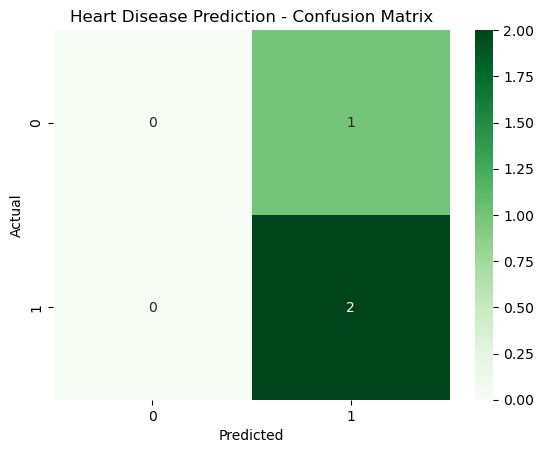

In [8]:
# Step 5: Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Heart Disease Prediction - Confusion Matrix")
plt.show()
